Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" (url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8')



- Вивести перші рядки таблиці за допомогою методу head

In [1]:
import pandas as pd

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
df = table[0].head()
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


- Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [ ]:
df.shape

(5, 9)

- Замініть у таблиці значення "—" на значення NaN

In [ ]:
df.replace("—", 'NaN')

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


- Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [ ]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

- Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [3]:
for column in df.columns[1:]:
    df.loc[:, column] = pd.to_numeric(df[column], errors='coerce')


df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [ ]:
missing_counts = df.isnull().sum()
rows = len(df)
missing_part = missing_counts / rows

missing_part[1:]

1950    0.0
1960    0.0
1970    0.0
1990    0.0
2000    0.0
2012    0.0
2014    0.2
2019    0.4
dtype: float64

- Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [ ]:
df.drop(len(df)-1)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1


- Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [ ]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'


tables = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
df = tables[0].head()

df = df.replace('—', np.nan)

for column in df.columns[1:]:
    df[column] = df[column].astype(float)

df = df.fillna(df.mean(numeric_only=True))

df


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.075,8.266667
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.266667


- Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [ ]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tables = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
df = tables[0].head(len(df)-1)

df = df.replace('—', np.nan)

for column in df.columns[1:]:
    df[column] = df[column].astype(float)

average_birth_rate_2019 = df['2019'].mean()

regions_above_average = df[df['2019'] > average_birth_rate_2019]['Регіон']

regions_above_average.tolist()

['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

- У якому регіоні була найвища народжуваність у 2014 році?

In [ ]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tables = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
df = tables[0].head(len(df)-1)

df = df.replace('—', np.nan)

for column in df.columns[1:]:
    df[column] = df[column].astype(float)

max_birth_rate_2014_region = df.loc[df['2014'].idxmax()]

max_birth_rate_2014_region['Регіон']



'Рівненська'

- Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

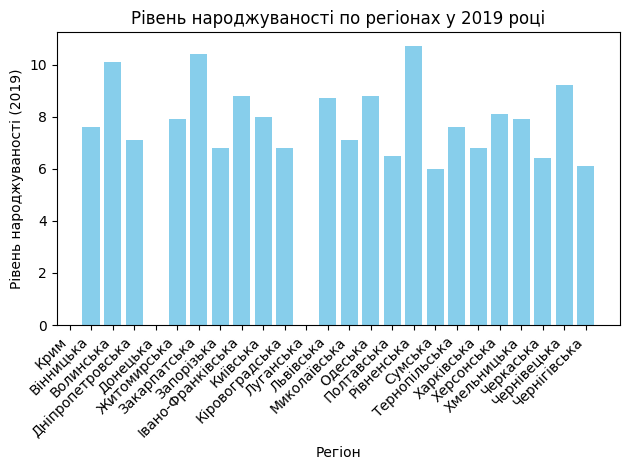

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tables = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
df = tables[0].head(len(df)-1)

df = df.replace('—', np.nan)

for column in df.columns[1:]:
    df[column] = df[column].astype(float)

plt.bar(
    df['Регіон'],
    df['2019'],
)

plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності (2019)')
plt.title('Рівень народжуваності по регіонах у 2019 році')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

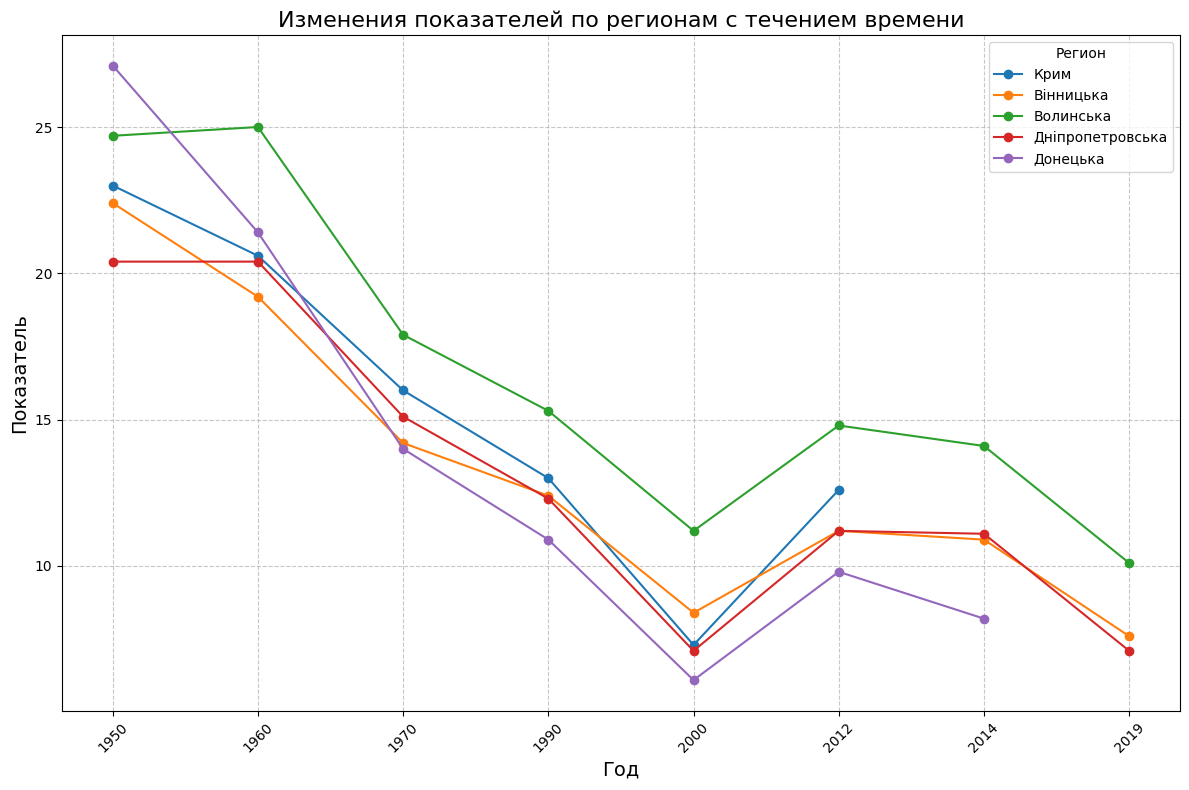

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for region in df['Регіон']:
    plt.plot(df.columns[1:], df[df['Регіон'] == region].iloc[0, 1:], marker='o', label=region)
plt.title('Изменения показателей по регионам с течением времени', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Показатель', fontsize=14)
plt.legend(title='Регион')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


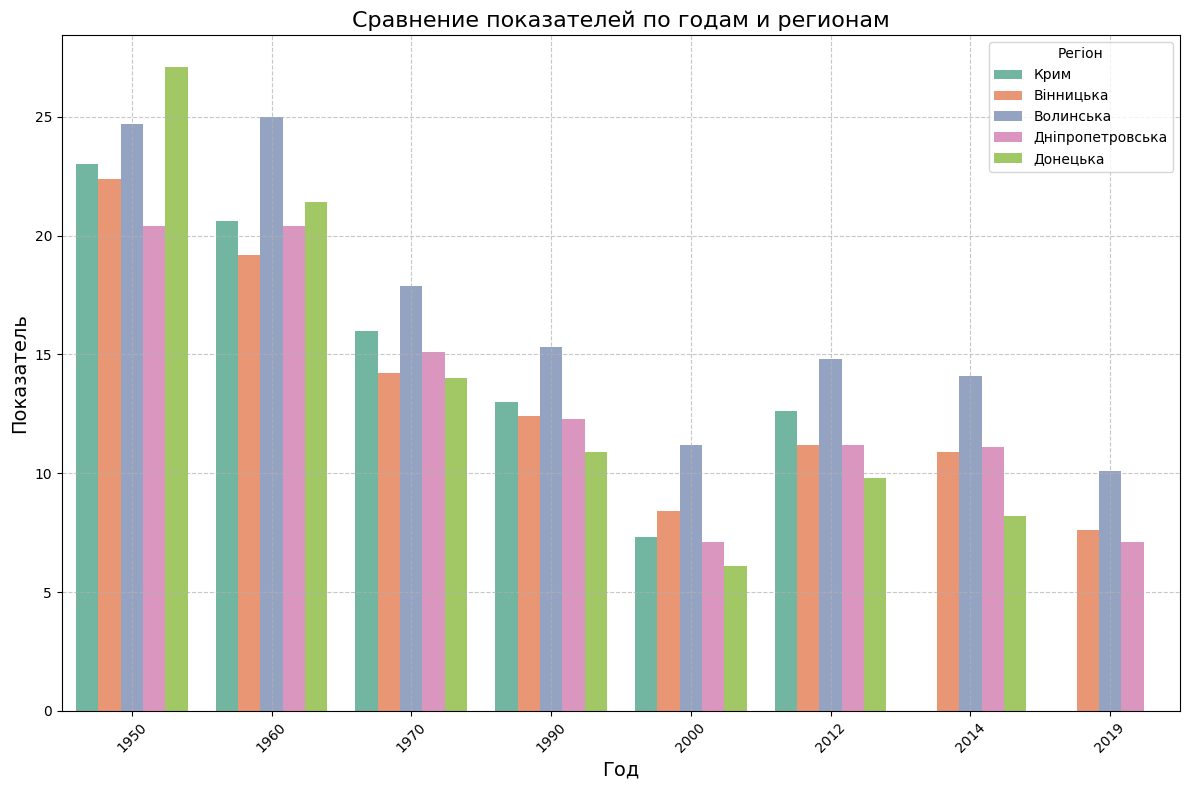

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df.melt(id_vars='Регіон', var_name='Год', value_name='Показатель')

plt.figure(figsize=(12, 8))
sns.barplot(x='Год', y='Показатель', hue='Регіон', data=df_melted, palette='Set2')
plt.title('Сравнение показателей по годам и регионам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Показатель', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


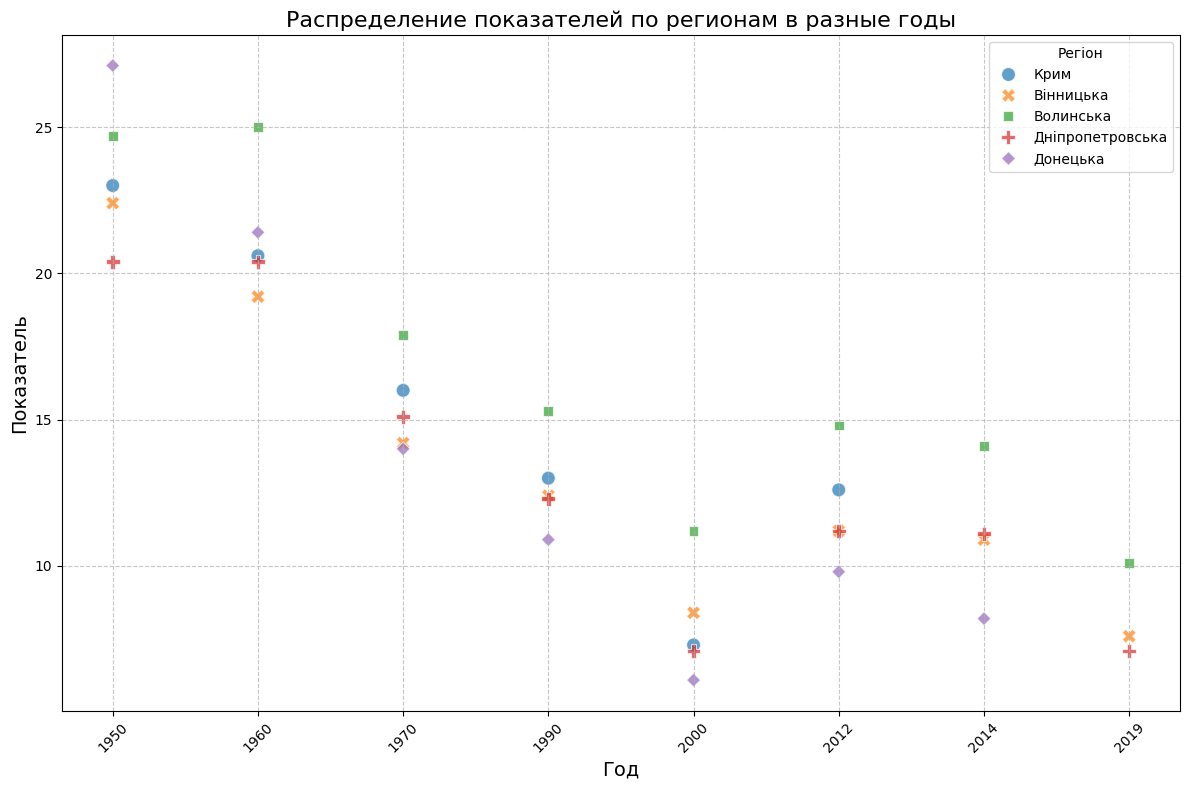

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Год', y='Показатель', hue='Регіон', style='Регіон',
    data=df_melted, palette='tab10', s=100, edgecolor='w', alpha=0.7
)
plt.title('Распределение показателей по регионам в разные годы', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Показатель', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()